In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
mobile_train = pd.read_csv('mobile_train.csv')
mobile_test = pd.read_csv('mobile_test.csv')
mobile_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### EDA

Understanding each feature
1) Numerical battery_power - battery capacity measured in mAh (Numerical)
2) blue - whether or not the phone has bluetooth (Categorical)
3) clock_speed - speed at which the microprocessor executes intstructions (Numerical)
4) dual_sim - is it dual sim or not (Categorical)
5) fc - front camera's megapixels (Numerical)
6) four_g - is it 4g enabled or not (Categorical)
7) int_memory - internal memory in gigabytes (Numerical)
8) m_dep - mobile depth in cms (Numerical)
9) mobile_wt - weight of mobile in gms (Numerical)
10) n_cores - number of cores (Numerical/Categorical)
11) pc - primary camera megapixels (Numerical)
12) px_height - pixel resolution height (Numerical)
13) px_width - pixel resolution width (Numerical)
14) ram - ram capacity in megabytes (Numerical)
15) sc_h -  screen height in cms (Numerical)
16) sc_w - screen width in cms (Numerical)
17) talk_time - longest time that a single charge will last (Numerical)
18) three_g - has 3g or not (Categorical)
19) touch_screen - is it touch screen or not (Categorical)
20) wifi - does it have wifi or not (Categorical)

The Target variable (multiclassed target)
1) price_range - (0,1,2,3)

In [3]:
categorical_cols = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
numerical_cols = [col for col in mobile_train.columns if col not in categorical_cols]
numerical_cols.remove('price_range')

In [4]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
mobile_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
# to get some idea about data being categorical or numerical
mobile_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [7]:
# to check for any nulls values present in each column
mobile_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: xlabel='price_range', ylabel='count'>

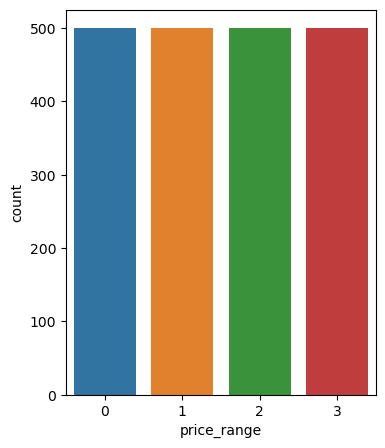

In [8]:
# all classes are equally represented, there is no class imbalance to worry about
plt.figure(figsize=(4,5))
sns.countplot(x='price_range', data=mobile_train)

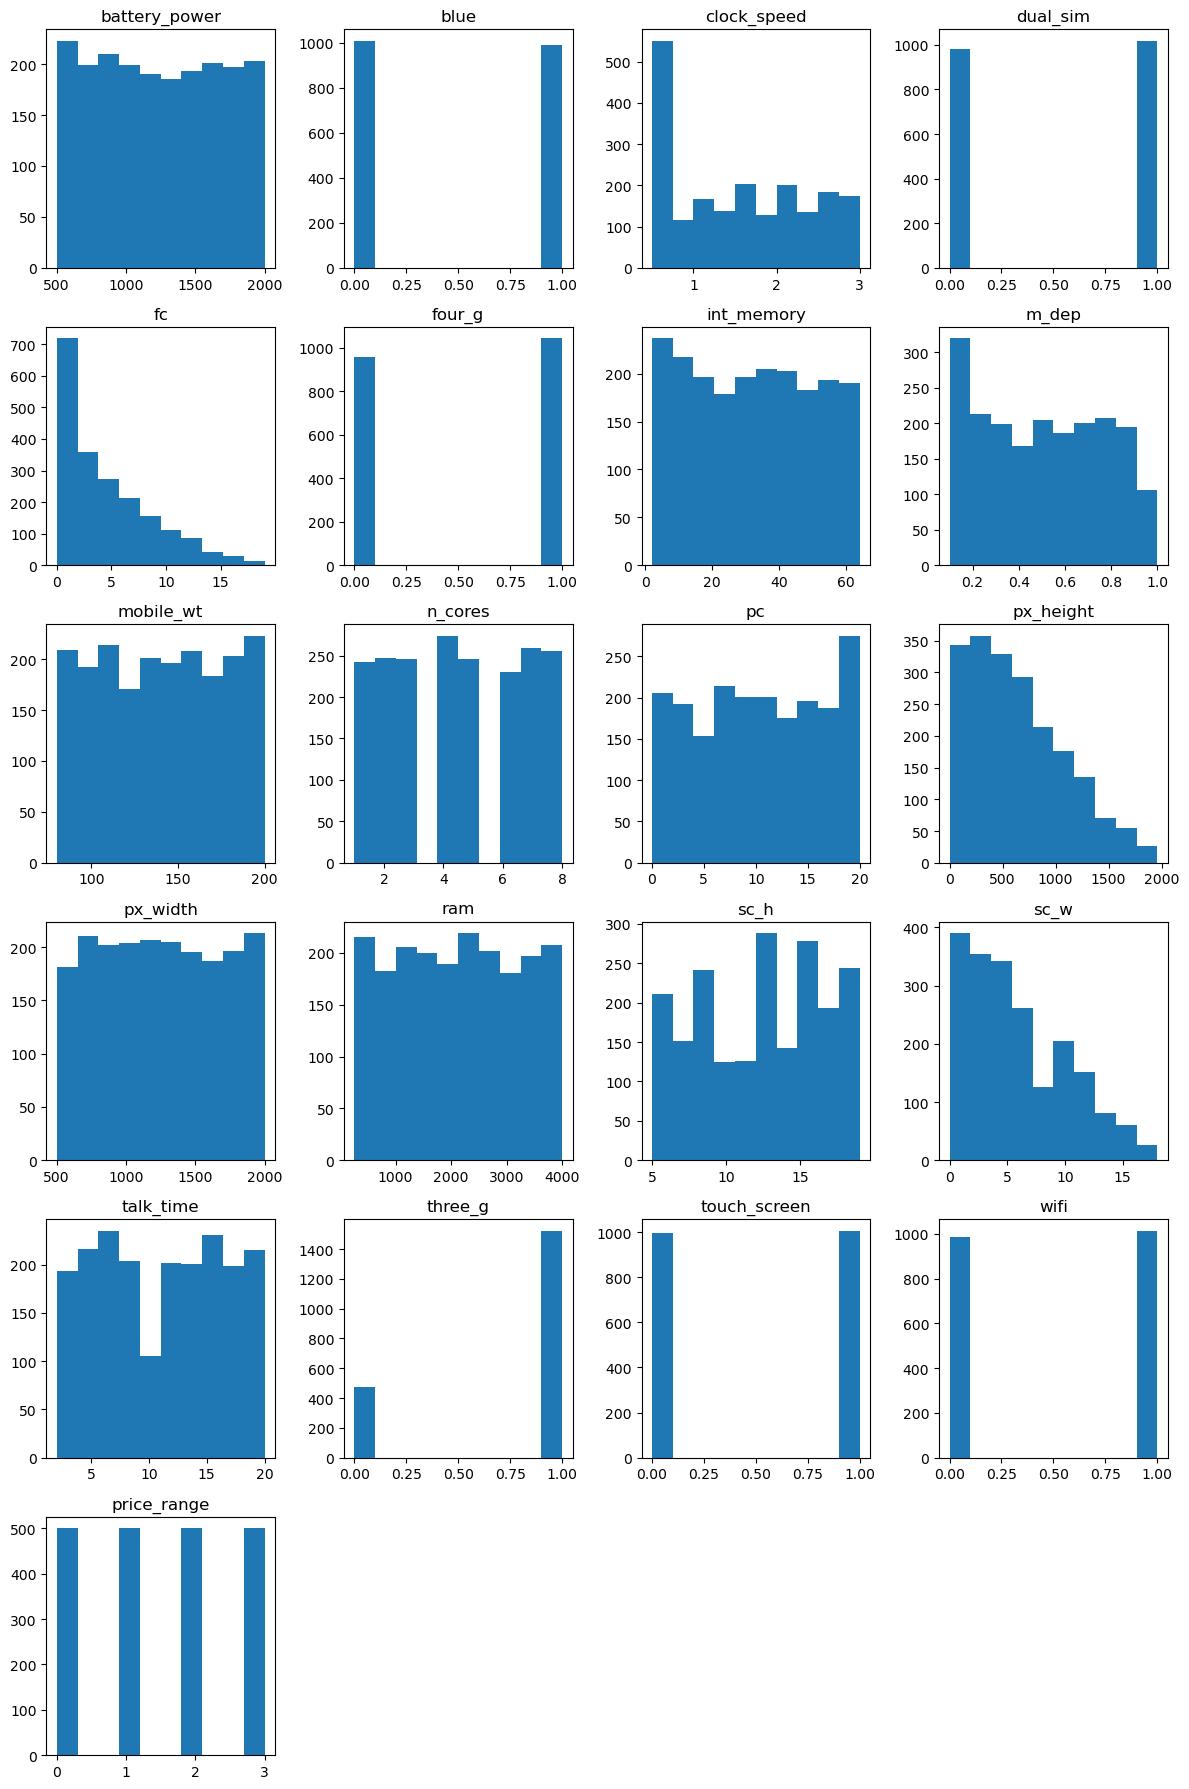

In [9]:
# we are not using the dataframe.hist() method directly because doing so, will add a lot of noise text to the plot and reduce the size of the plot
# this code below creates subplots and then iterates through each column in the mobile_train DataFrame to plot individual histograms on their 
# designated subplots without displaying the array of Axes objects.
num_cols = len(mobile_train.columns)
num_rows = (num_cols - 1) // 4 + 1  # Calculate the number of rows based on the number of columns
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, num_rows * 3))  # Adjust figsize as needed
# Plotting each histogram in its designated subplot
for i, column in enumerate(mobile_train.columns):
    r, c = i // 4, i % 4
    axes[r, c].hist(mobile_train[column])
    axes[r, c].set_title(column)
# Hide unused subplots
for i in range(num_cols, num_rows * 4):
    axes.flatten()[i].axis('off')
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

as evident from the histograms there is a class imbalance in the three_g column (around 500 NOs and 1500 YESs) we must decide if we 
want to leave it as it is or work towards undoing the class imbalance, for now we will leave it as it is and resurface this issue further.
The other categorical variables do not seem to have class imbalance or outliers.

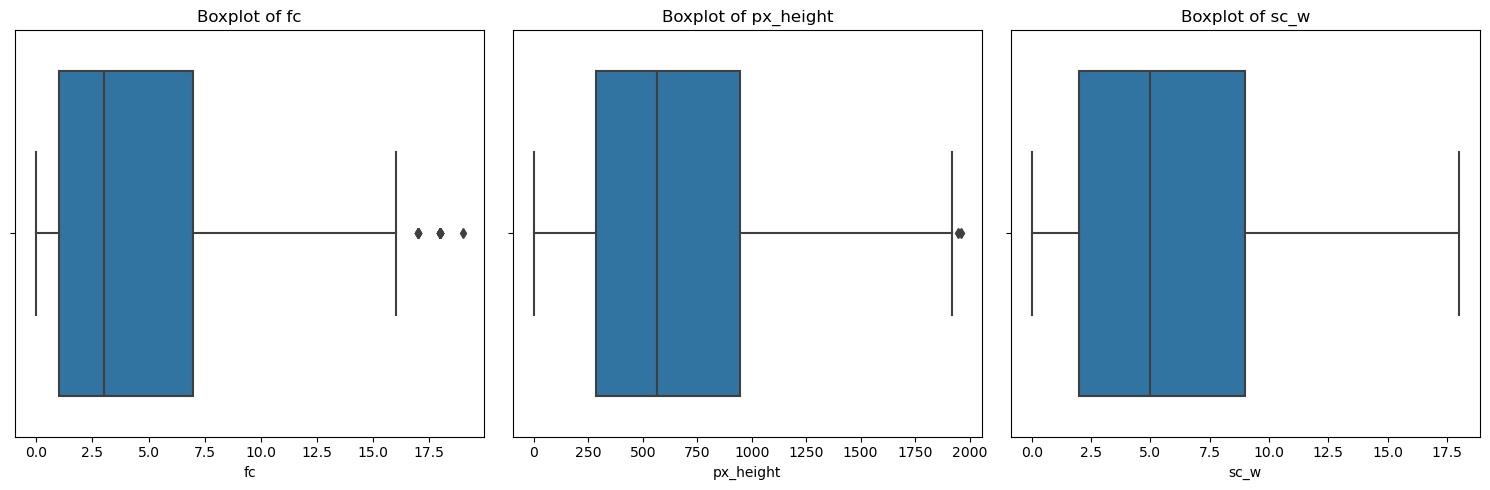

In [10]:
# we see that since these columns have a somewhat exponential growth they are expected to have outliers
# 2 out of the 3 columns do have outliers
columns = ['fc', 'px_height', 'sc_w']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust figsize as needed
# Plotting boxplots for each specified column
for i, column in enumerate(columns):
    sns.boxplot(x=mobile_train[column], ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

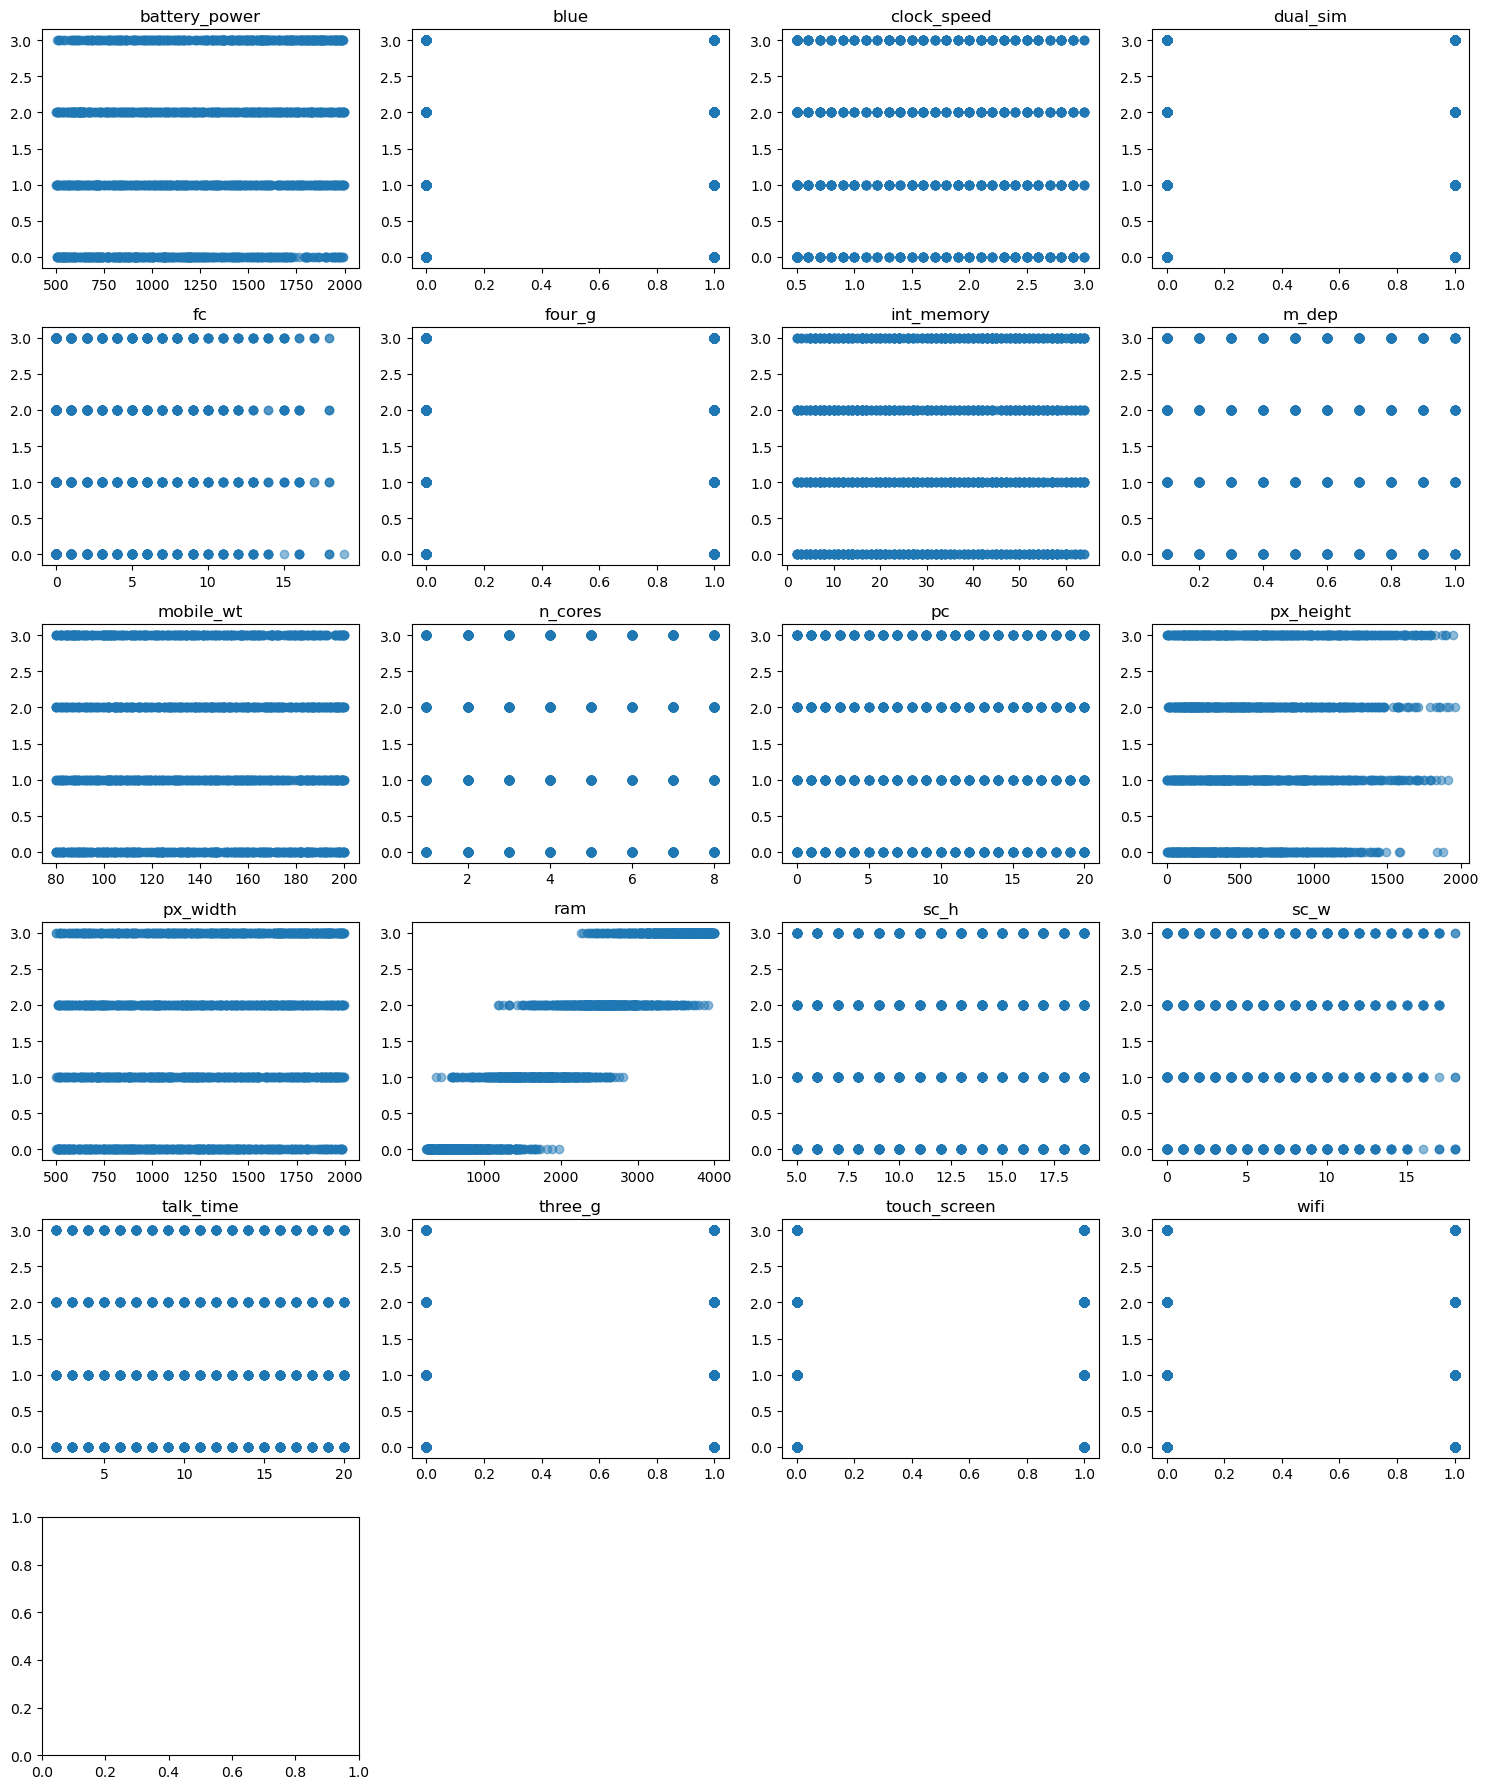

In [11]:
num_cols = len(mobile_train.columns)
num_rows = (num_cols - 1) // 4 + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(15, num_rows * 3))
# Plotting each variable against the 'price_range' column
for i, column in enumerate(mobile_train.columns):
    if column != 'price_range':
        r, c = i // 4, i % 4
        axes[r, c].scatter(mobile_train[column], mobile_train['price_range'], alpha=0.5)
        axes[r, c].set_title(column)
        # Hide ticks and labels while showing outlines
        axes[r, c].tick_params(bottom=True, left=True)
        for spine in axes[r, c].spines.values():
            spine.set_visible(True)
# Hide any excess subplots
for i in range(num_cols, num_rows * 4):
    axes.flatten()[i].axis('off')
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

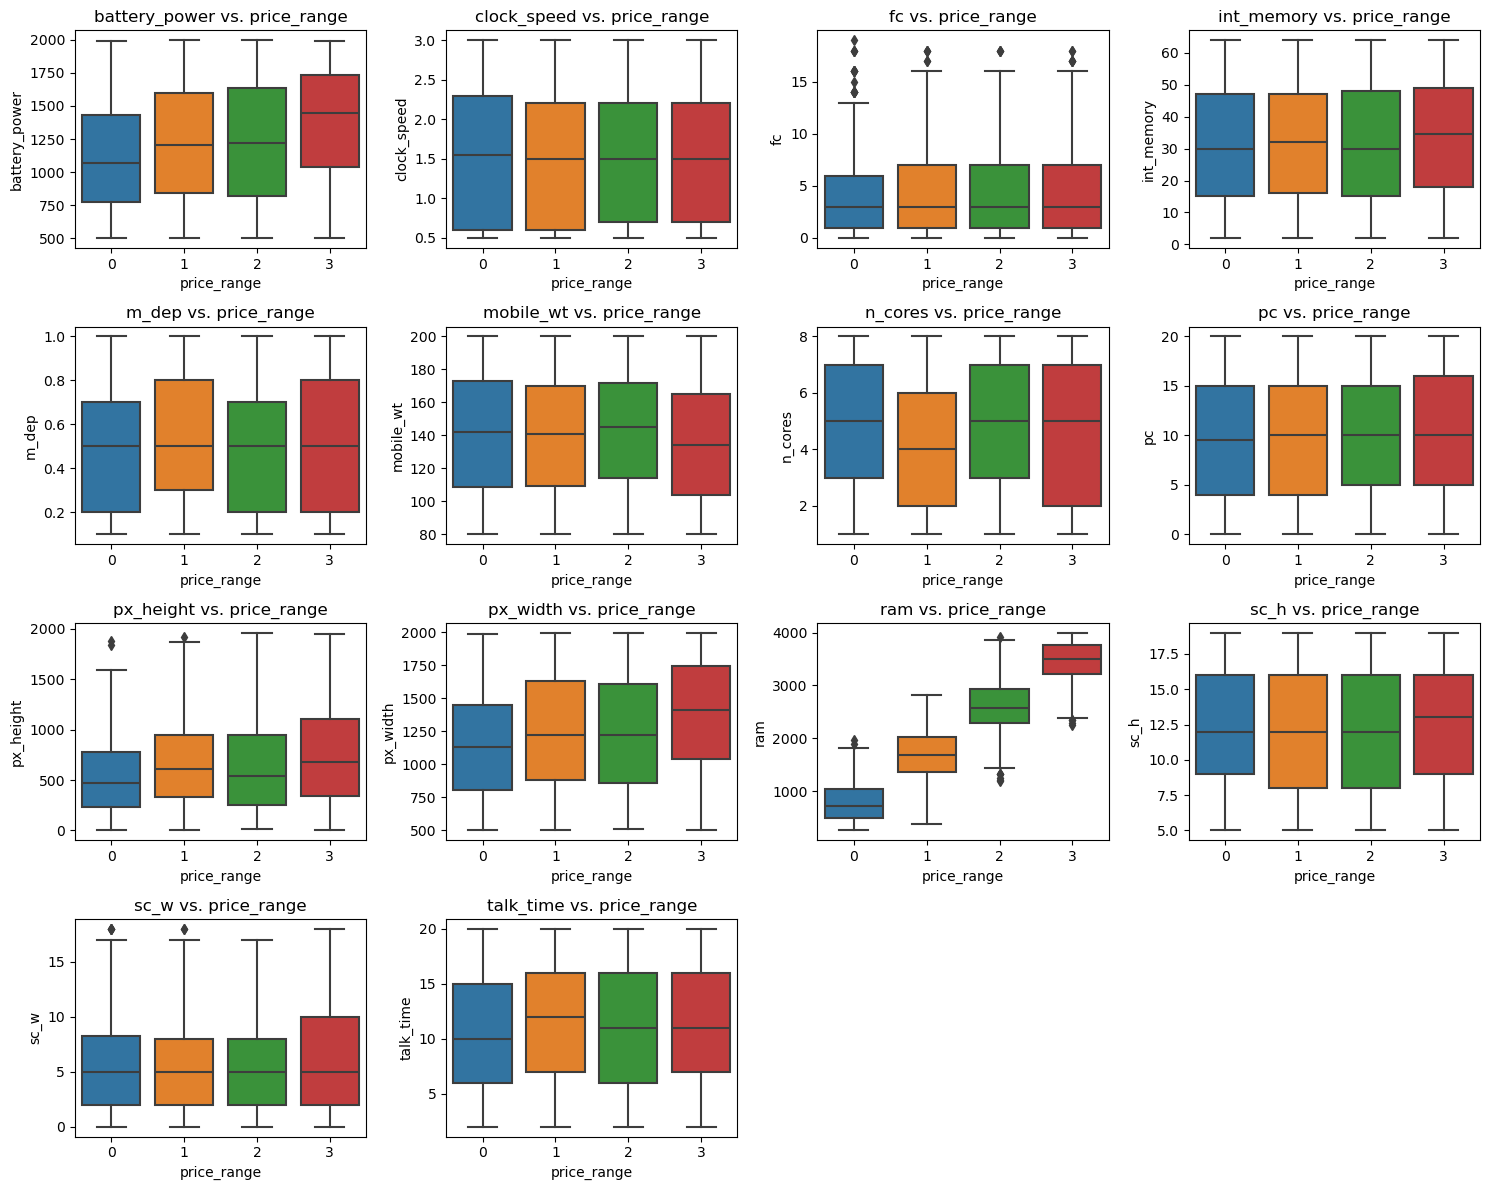

In [12]:
num_cols = len(numerical_cols)
num_rows = (num_cols - 1) // 4 + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(15, num_rows * 3))
# Plotting boxplots for numerical variables against 'price_range'
for i, column in enumerate(numerical_cols):
    r, c = i // 4, i % 4
    sns.boxplot(x='price_range', y=column, data=mobile_train, ax=axes[r, c])
    axes[r, c].set_title(f"{column} vs. price_range")
# Hide any excess subplots
for i in range(num_cols, num_rows * 4):
    axes.flatten()[i].axis('off')
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

as seen from the histograms earlier, fc has a sort of exponential growth where the frequency drops with increase in quantum of fc
and due to the presence of this sort of growth, we see the outliers as confirmed by the boxplots

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


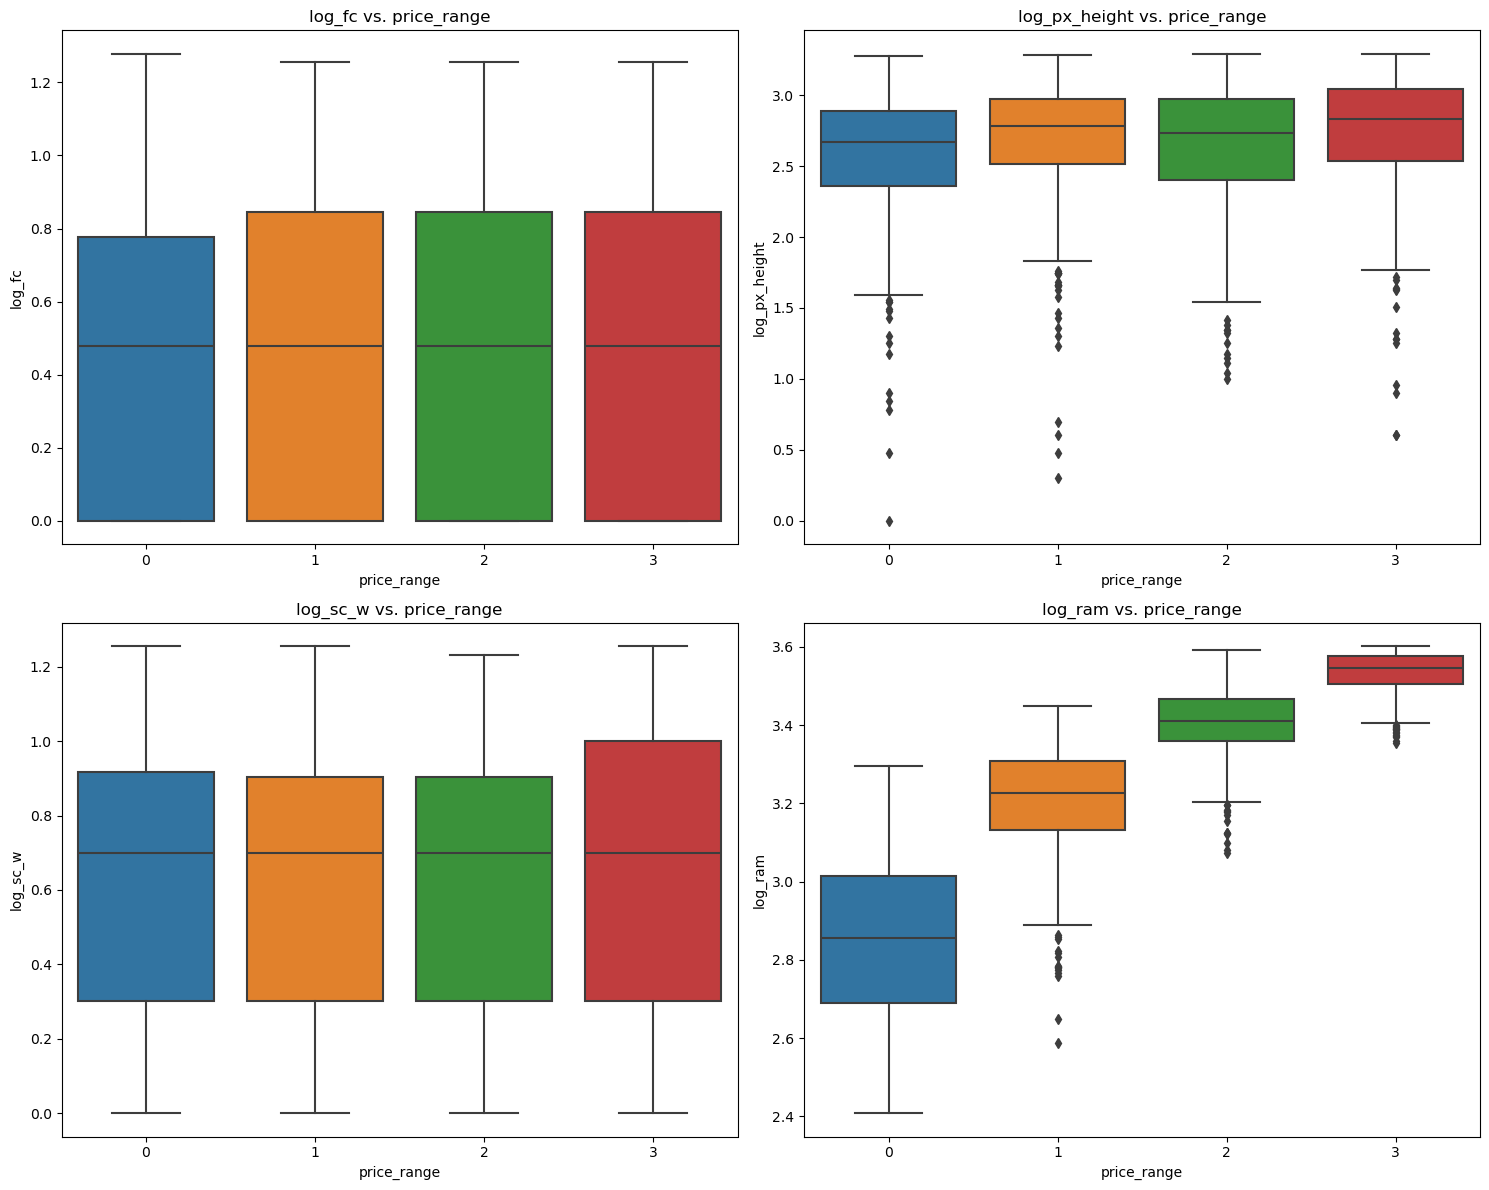

In [13]:
# lets try log transforming the variables that have outliers
mobile_train['log_fc'] = np.log10(mobile_train['fc'])
mobile_train['log_px_height'] = np.log10(mobile_train['px_height'])
mobile_train['log_sc_w'] = np.log10(mobile_train['sc_w'])
mobile_train['log_ram'] = np.log10(mobile_train['ram'])

log_cols = ['log_fc','log_px_height','log_sc_w','log_ram']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, num_rows * 3))
# Plotting boxplots for numerical variables against 'price_range'
for i, column in enumerate(log_cols):
    r, c = i // 2, i % 2
    sns.boxplot(x='price_range', y=column, data=mobile_train, ax=axes[r, c])
    axes[r, c].set_title(f"{column} vs. price_range")
# Hide any excess subplots
for i in range(num_cols, num_rows * 2):
    axes.flatten()[i].axis('off')
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

log transforming seems to have worked for fc and sc_w but doesnt work for ram and px_height

In [14]:
# we will remove these transformed columns for now but will return to them if need be
# mobile_train.drop(['log_fc','log_px_height','log_sc_w','log_ram'], axis=1, inplace = True)

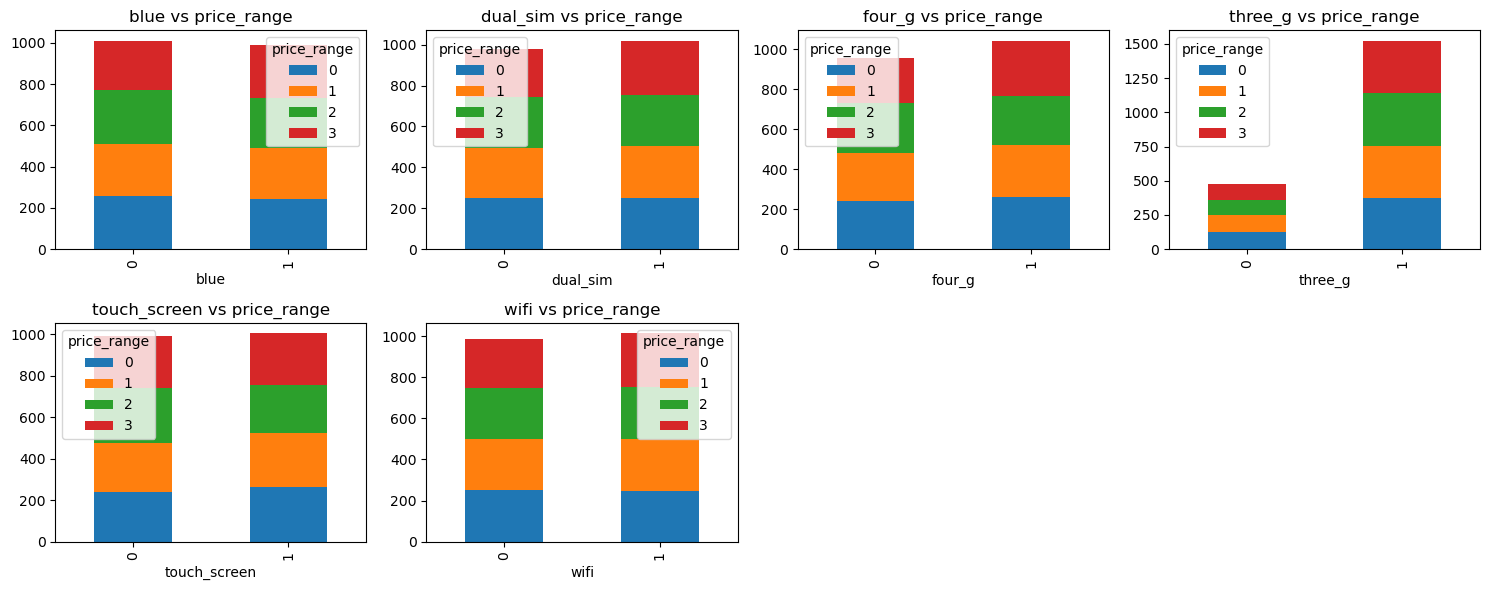

In [15]:
num_cols = len(categorical_cols)
num_rows = (num_cols - 1) // 4 + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(15, num_rows * 3))
# Plotting heatmap for each categorical variable against 'price_range'
for i, column in enumerate(categorical_cols):
    r, c = i // 4, i % 4
    cross_tab = pd.crosstab(mobile_train[column], mobile_train['price_range'])
    cross_tab.plot(kind='bar', stacked=True, ax=axes[r, c])
    axes[r, c].set_title(f"{column} vs price_range")
    axes[r, c].legend(title='price_range')
# Hide any excess subplots
for i in range(num_cols, num_rows * 4):
    axes.flatten()[i].axis('off')
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

as can be seen from the above graphs the price range categories are split evenly between each class of the categorical predictor except for 
three_g variable. 
for eg. In the variable 'blue' the two classes are 0 and 1 and the count of each price range category (0,1,2,3) are similar in both.

### Base case (Logistic Regression)

In [16]:
# we will remove these transformed columns for now but will return to them if need be
mobile_train.drop(['log_fc','log_px_height','log_sc_w','log_ram'], axis=1, inplace = True)

In [17]:
mobile_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [18]:
mobile_train['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [19]:
# First lets fit the most basic model without any change in data and see the results
X = mobile_train.drop(['price_range'], axis=1)
y = mobile_train['price_range']

# Do the test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check accuracy of model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

# we didnt have to treat or encode the categorical variables because they are already given as 0 or 1 both values are numeric so the model got it.

Accuracy: 0.6325
Confusion Matrix:
[[79 25  1  0]
 [17 46 20  8]
 [ 0 17 46 29]
 [ 0  1 29 82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.52      0.51      0.51        91
           2       0.48      0.50      0.49        92
           3       0.69      0.73      0.71       112

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400



C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


most basic model gives around 63.25% accuracy. we can do considerably better, lets see how!

### Preprocessing

1. While using linear models like Logistic regression, it is recommended to handle correlated features before fitting model

#### Variance Inflation Factor

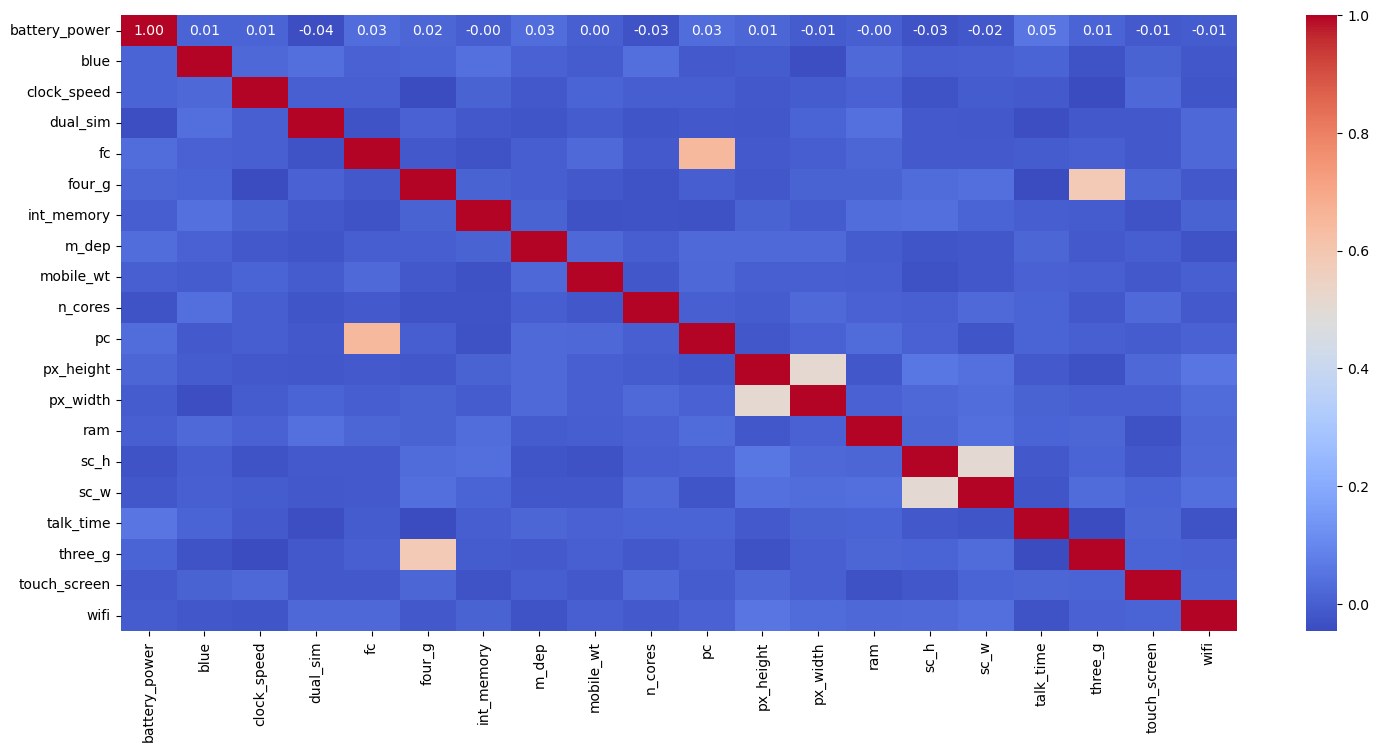

In [20]:
correlation_matrix = mobile_train.drop('price_range', axis=1).corr()
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [21]:
# first we will try to identify correlated features using VIF
def calculate_vif(data_frame):
    features = data_frame.columns
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data.sort_values(by='VIF', ascending=False)

# Display VIF results
vif_results = calculate_vif(mobile_train.drop(['price_range'], axis=1)) # we cant keep the target variable
print(vif_results)

          Feature        VIF
8       mobile_wt  12.972548
12       px_width  11.766282
14           sc_h  11.510780
0   battery_power   8.076717
10             pc   6.228797
17        three_g   6.191783
16      talk_time   4.859144
13            ram   4.688608
9         n_cores   4.646070
11      px_height   4.262680
2     clock_speed   4.260479
6      int_memory   3.961239
7           m_dep   3.911115
15           sc_w   3.720867
4              fc   3.413529
5          four_g   3.194321
19           wifi   2.021012
3        dual_sim   2.015006
18   touch_screen   1.989078
1            blue   1.981927


VIF for a feature is the inverse of (1-r squared) value of the regression of that feature against all the other features used in the model. 
VIF = 1/(1-r squared). so when a certain feature can be predicted well by the other features then the r squared value will be high (close to 1) and so the VIF factor value will also be high, indicating highly correlated feature

It is recommended to drop features with a VIF value greater than 5 so we will do that

In [22]:
mobile_train_vif = mobile_train.drop(['price_range'], axis=1)
def drop_high_vif_features(data_frame, threshold=5):
    while True:
        vif_results = calculate_vif(data_frame)
        max_vif_feature = vif_results.loc[vif_results['VIF'].idxmax(), 'Feature']
        max_vif_value = vif_results.loc[vif_results['VIF'].idxmax(), 'VIF']
        
        if max_vif_value > threshold:
            print(f"Dropping feature '{max_vif_feature}' with VIF {max_vif_value}")
            data_frame = data_frame.drop(columns=max_vif_feature)
        else:
            break
    return data_frame

In [23]:
mobile_train_vif = drop_high_vif_features(mobile_train_vif)

Dropping feature 'mobile_wt' with VIF 12.972548425819065
Dropping feature 'px_width' with VIF 11.470014131904488
Dropping feature 'sc_h' with VIF 11.086593845458365
Dropping feature 'battery_power' with VIF 7.543843177190293
Dropping feature 'pc' with VIF 6.050059878559392
Dropping feature 'three_g' with VIF 5.930418164840767


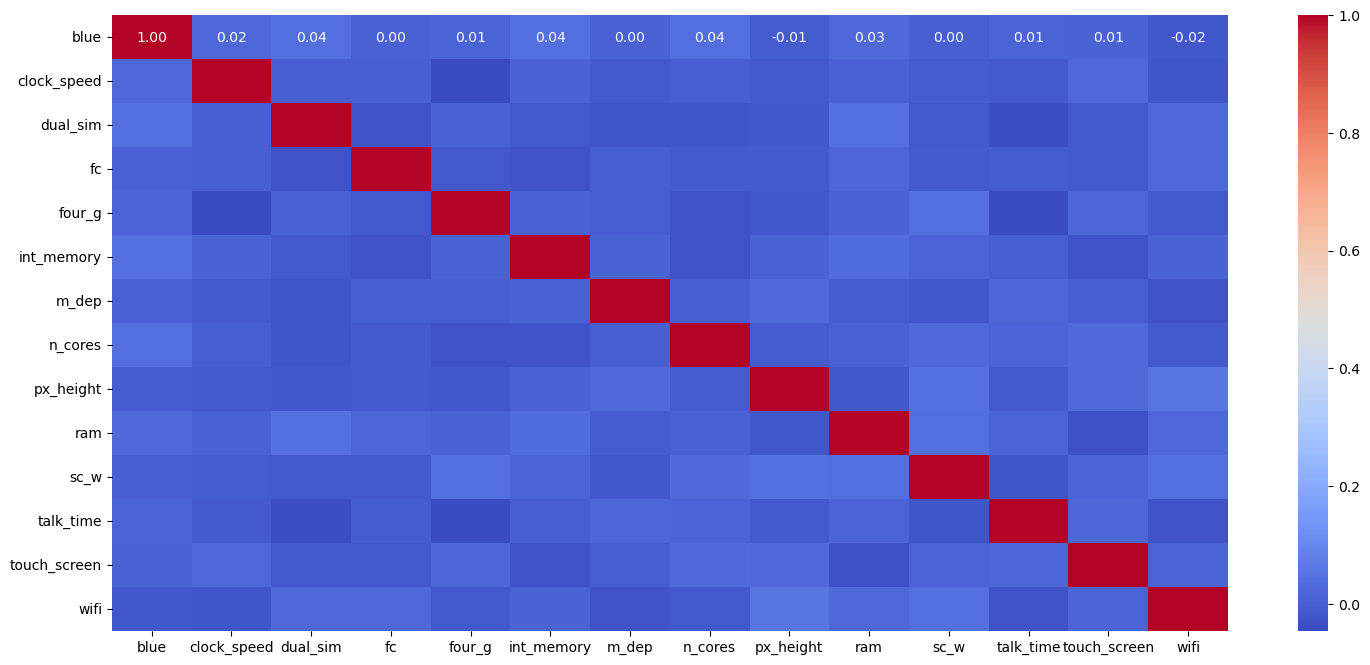

In [24]:
correlation_matrix = mobile_train_vif.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

We will use this new dataframe and try to fit a logistic model to this to see how it works

In [25]:
X_vif = mobile_train_vif
y_vif = mobile_train['price_range']
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(X_vif, y_vif, test_size=0.2, random_state=42)

In [26]:
## now lets standardize the data
scaler = StandardScaler()
X_train_vif_scaled = scaler.fit_transform(X_train_vif)
X_test_vif_scaled = scaler.transform(X_test_vif)

### Logistic Regression with Preprocessing

In [27]:
model_vif = LogisticRegression()
model_vif.fit(X_train_vif_scaled, y_train_vif)

# Make predictions
y_pred_vif = model_vif.predict(X_test_vif_scaled)

# Check accuracy of model
accuracy_lr = accuracy_score(y_test_vif, y_pred_vif)
conf_matrix_lr = confusion_matrix(y_test_vif, y_pred_vif)
classification_rep_lr = classification_report(y_test_vif, y_pred_vif)

print(f"Accuracy: {accuracy_lr}")
print(f"Confusion Matrix:\n{conf_matrix_lr}")
print(f"Classification Report:\n{classification_rep_lr}")

Accuracy: 0.79
Confusion Matrix:
[[93 12  0  0]
 [12 61 18  0]
 [ 0 10 68 14]
 [ 0  0 18 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       105
           1       0.73      0.67      0.70        91
           2       0.65      0.74      0.69        92
           3       0.87      0.84      0.85       112

    accuracy                           0.79       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.79      0.79       400



As we clearly see the preprocessing has improved the accuracy from 63% to 79%

### Decision Tree 

In [28]:
dt_classifier = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [10,20,30]
}
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train_vif_scaled, y_train_vif) # using the data that is scaled and has features with vif<=5

best_params_dt = grid_search.best_params_
print(f"Best Hyperparameters: {best_params_dt}")

# Evaluate on the test set
model_dt = grid_search.best_estimator_

# Make predictions
y_pred_dt = model_dt.predict(X_test_vif_scaled)

# Check accuracy of model
accuracy_dt = accuracy_score(y_test_vif, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test_vif, y_pred_dt)
classification_rep_dt = classification_report(y_test_vif, y_pred_dt)

print(f"Accuracy: {accuracy_dt}")
print(f"Confusion Matrix:\n{conf_matrix_dt}")
print(f"Classification Report:\n{classification_rep_dt}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 30, 'min_samples_split': 2}
Accuracy: 0.76
Confusion Matrix:
[[88 17  0  0]
 [15 55 21  0]
 [ 0 11 65 16]
 [ 0  0 16 96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       105
           1       0.66      0.60      0.63        91
           2       0.64      0.71      0.67        92
           3       0.86      0.86      0.86       112

    accuracy                           0.76       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.76      0.76      0.76       400



The Decision Tree algorithm isnt performing exactly better than the logistic regression

### SVM

In [29]:
svm_classifier = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

grid_search_svm = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search_svm.fit(X_train_vif_scaled, y_train_vif)

best_params = grid_search_svm.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluate on the test set
model_svm = grid_search_svm.best_estimator_

# Make predictions
y_pred_svm = model_svm.predict(X_test_vif_scaled)

# Check accuracy of model
accuracy_svm = accuracy_score(y_test_vif, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test_vif, y_pred_svm)
classification_rep_svm = classification_report(y_test_vif, y_pred_svm)

print(f"Accuracy: {accuracy_svm}")
print(f"Confusion Matrix:\n{conf_matrix_svm}")
print(f"Classification Report:\n{classification_rep_svm}")


Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.76
Confusion Matrix:
[[88 17  0  0]
 [15 55 21  0]
 [ 0 11 65 16]
 [ 0  0 16 96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       105
           1       0.66      0.60      0.63        91
           2       0.64      0.71      0.67        92
           3       0.86      0.86      0.86       112

    accuracy                           0.76       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.76      0.76      0.76       400



### Logistic Regression with Neural Network 

Let's try to implement logistic regression using NN from scratch

This is the dataset - X_train_vif_scaled, X_test_vif_scaled, y_train_vif, y_test_vif

In [30]:
X_train_vif_scaled.shape

(1600, 14)

In [31]:
y_train_vif.shape,y_test_vif.shape

((1600,), (400,))

For ease of implementation we will take transform of the inputs and use it so that each column represents individual observation

In [32]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = X_train_vif_scaled.T, X_test_vif_scaled.T, y_train_vif.T, y_test_vif.T

In [33]:
X_train_nn.shape,y_train_nn.shape

((14, 1600), (1600,))

In [34]:
## we can see that y's shape hasnt really changed and we will need to reshape it to 1,m shape
y_train_nn,y_test_nn = y_train_vif.to_numpy().reshape((1,1600)), y_test_vif.to_numpy().reshape((1,400))
y_train_nn.shape,y_test_nn.shape

((1, 1600), (1, 400))

In [64]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # for numerical stability
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

def initialize_parameters(n, num_classes):
    w = np.random.randn(n, num_classes) * 0.01
    b = np.zeros((num_classes, 1))
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # Forward propagation
    Z = np.dot(w.T, X) + b
    A = softmax(Z)
    cost = -1/m * np.sum(np.log(A[Y, np.arange(m)]))
    
    # Backward propagation
    dz = A.copy()
    dz[Y, np.arange(m)] -= 1
    dw = 1/m * np.dot(X, dz.T)
    db = 1/m * np.sum(dz, axis=1, keepdims=True)
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate):
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        # Update parameters
        w -= learning_rate * grads["dw"]
        b -= learning_rate * grads["db"]
    
    return w, b

def predict(w, b, X):
    Z = np.dot(w.T, X) + b
    A = softmax(Z)
    predictions = np.argmax(A, axis=0)
    return predictions


def accuracy(predictions, actual_labels):
    correct_predictions = np.sum(predictions == actual_labels)
    total_examples = len(actual_labels[0])
    acc = correct_predictions / total_examples
    return acc

In [86]:
# X_train_nn, X_test_nn, y_train_nn, y_test_nn
w, b = initialize_parameters(X_train_nn.shape[0], num_classes=4)

# Optimize parameters
w, b = optimize(w, b, X_train_nn, y_train_nn, num_iterations=1000, learning_rate=0.01)

predictions = predict(w, b, X_train_nn)

print("Predictions:", predictions)

accuracy_scores = accuracy(predictions, y_train_nn)
print("Accuracy:",accuracy_scores*100, "%")

Predictions: [1 3 1 ... 2 3 1]
Accuracy: 69.5 %


In [89]:
# Make predictions using test set
test_predictions = predict(w, b, X_test_nn)
accuracy_scores_test = accuracy(test_predictions, y_test_nn)
print("Accuracy:",accuracy_scores_test*100, "%")

Accuracy: 72.0 %


In [90]:
# Assuming 'predictions' is the output from your model and 'Y_train' is the true labels

# Create a confusion matrix
cm = confusion_matrix(np.squeeze(y_test_nn), np.squeeze(test_predictions))

# Calculate precision, recall, and other metrics for all classes
class_metrics = classification_report(np.squeeze(y_test_nn), np.squeeze(test_predictions))

print(f"Accuracy: {accuracy_scores_test}")
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(class_metrics)


Accuracy: 0.72
Confusion Matrix:
[[105   0   0   0]
 [ 33  40  17   1]
 [  0  10  38  44]
 [  0   0   7 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       105
           1       0.80      0.44      0.57        91
           2       0.61      0.41      0.49        92
           3       0.70      0.94      0.80       112

    accuracy                           0.72       400
   macro avg       0.72      0.70      0.68       400
weighted avg       0.72      0.72      0.69       400

